In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.patches as patches
import matplotlib.font_manager

import pandas as pd
import scipy.signal as signal
import ipywidgets as widgets

import pims
import cv2 as cv
import trackpy as tp

%matplotlib --list
%matplotlib widget

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams.update({'font.size':14})

print('\npandas version no.:', pd.__version__)

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']

pandas version no.: 1.4.3


## HTML video (mime type) viewer

In [2]:
%%HTML
<video width="416" height="400" controls>
  <source src="suppementary_video.mp4" type="video/mp4">
</video>

https://soft-matter.github.io/pims/v0.6.1/search.html?q## PIMS version

## READ video with PIMS (recommended)


pixel type is:  uint16

movie length is :  38419

image resolution is:  (832, 800)  (X ,Y )


first frame image:



Frame([[158, 150, 162, ..., 173, 169, 145],
       [154, 157, 148, ..., 198, 163, 130],
       [153, 152, 144, ..., 223, 183, 162],
       ...,
       [200, 195, 187, ..., 174, 132, 138],
       [189, 189, 187, ..., 133, 115, 111],
       [189, 170, 181, ..., 102,  99, 106]], dtype=uint16)
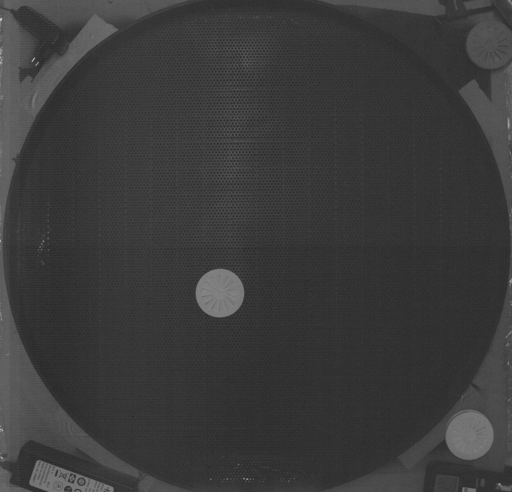

In [4]:
video = pims.Cine('/home/fvega/Datos/brownian_blades/180322/blanca_265.cine')
print('\npixel type is: ', video.pixel_type)
print('\nmovie length is : ', video.len())
print('\nimage resolution is: ', video.frame_shape, ' (X ,Y )\n')
print('\nfirst frame image:\n')
video[0]

In [4]:
np.max(video[0])

464

In [5]:
video.frame_shape
# X is 832 (no. of columns)
# Y is 800 (no. of rows)

(832, 800)

In [6]:
# NOTICE, HOWEVER:
np.shape(video[0])

(800, 832)

## MATRIX FORMAT: 
## first index is row (Y coord), second index is column (X coord)

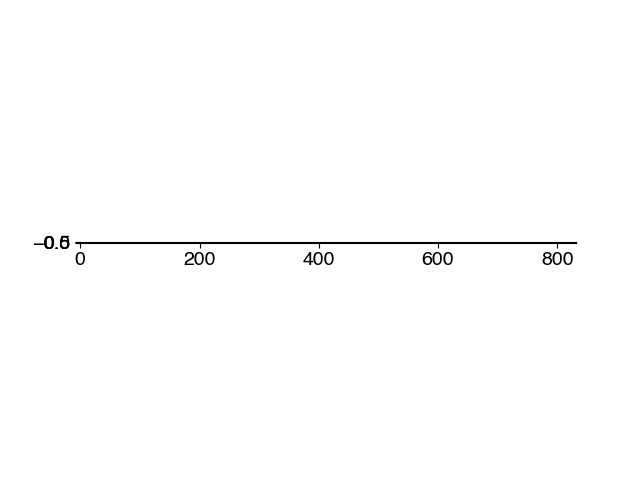

In [4]:
# display first row complete (Y value, 1st index)
plt.figure()
plt.imshow(video[0][0:1,:], cmap=cm.binary_r)

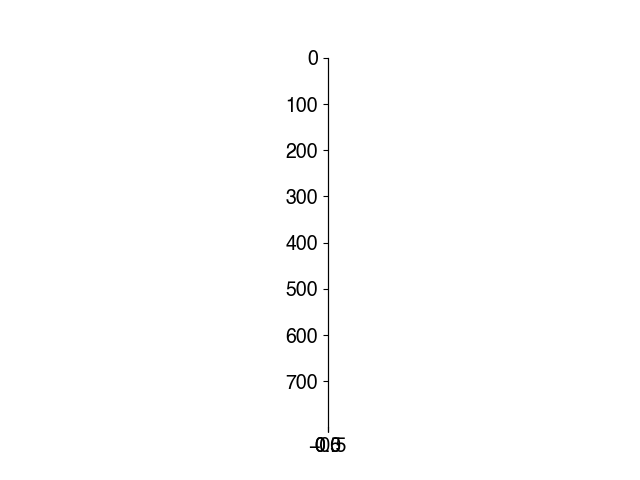

In [4]:
# display first column complete (X value, 2nd index)
plt.figure()
plt.imshow(video[0][:,0:1], cmap=cm.binary_r)
#plt.close()

255


Frame([[158, 150, 162, ..., 173, 169, 145],
       [154, 157, 148, ..., 198, 163, 130],
       [153, 152, 144, ..., 223, 183, 162],
       ...,
       [200, 195, 187, ..., 174, 132, 138],
       [189, 189, 187, ..., 133, 115, 111],
       [189, 170, 181, ..., 102,  99, 106]], dtype=uint8)
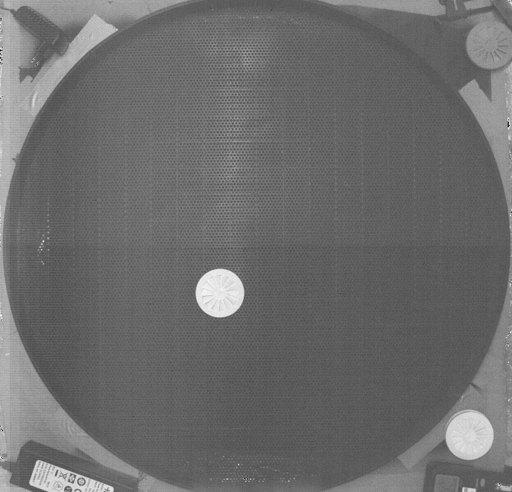

In [5]:
# standart conversion to 8-bit range ([0, 255])
print(np.max(video[0].astype('uint8')))
video[0].astype('uint8')


255


Frame([[158, 150, 162, ..., 173, 169, 145],
       [154, 157, 148, ..., 198, 163, 130],
       [153, 152, 144, ..., 223, 183, 162],
       ...,
       [200, 195, 187, ..., 174, 132, 138],
       [189, 189, 187, ..., 133, 115, 111],
       [189, 170, 181, ..., 102,  99, 106]], dtype=uint8)
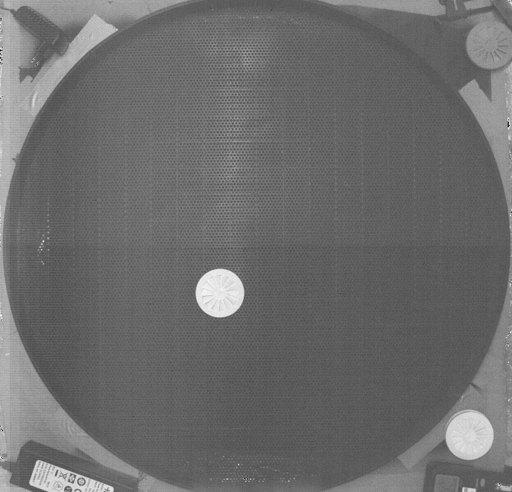

In [13]:
# numpy conversion to 8-bit range ([0, 255])
print(np.max(video[0].astype(np.uint8)))
video[0].astype(np.uint8)


In [14]:
# OpenCV conversion to 8-bit range ([0, 255])
print(np.max(cv.convertScaleAbs(video[0])))
cv.convertScaleAbs(video[0])


255


array([[158, 150, 162, ..., 173, 169, 145],
       [154, 157, 148, ..., 198, 163, 130],
       [153, 152, 144, ..., 223, 183, 162],
       ...,
       [200, 195, 187, ..., 174, 132, 138],
       [189, 189, 187, ..., 133, 115, 111],
       [189, 170, 181, ..., 102,  99, 106]], dtype=uint8)

### Display frame, OpenCV method (opens separate window)

In [5]:
def cvdisplay(image, tag):
    canvas_name = "frame no. " + str(tag) + ";\tpres 'q' to exit"
    cv.imshow(canvas_name, cv.convertScaleAbs(image))
    cv.waitKey(0)
    cv.destroyAllWindows()


In [6]:
cvdisplay(video[0], 0)

In [7]:
imm = cv.bitwise_xor(cv.convertScaleAbs(video[0]), cv.convertScaleAbs(video[2000]))

In [8]:
cvdisplay(imm,0)

### Display frame, plt.imshow METHOD

In [6]:
def pltdisplay(S, frame, tag):
    canvas_name = 'frame no. ' + str(tag)
    plt.figure(tag,figsize=(S,S))
    plt.title(canvas_name)
    # alternatively convert to 8-bit use opencv function
    plt.imshow(frame, cmap=cm.binary_r)

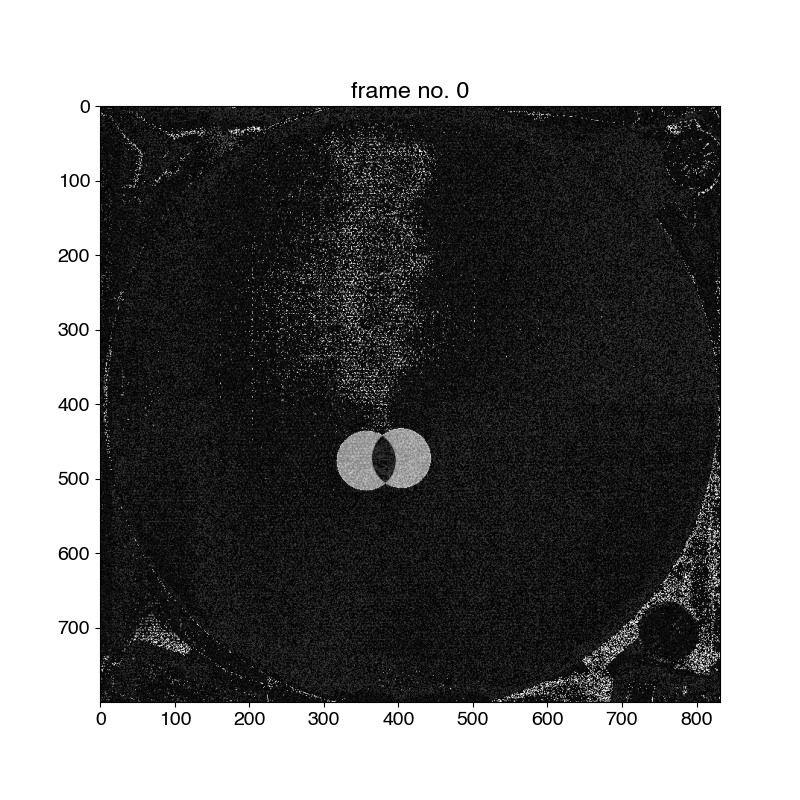

In [37]:
pltdisplay(8, imm, 0)

In [38]:
plt.close(0)

## Examples of pims frames properties

In [23]:
len(video.frame_time_stamps)

38419

In [24]:
video.image_count

38419

In [25]:
video.pixel_type

dtype('uint16')

In [26]:
video.frame_rate_avg

750.0067012877388

In [28]:
video.frame_rate

750

In [18]:
video.frame_time_stamps[:5]

[(datetime.datetime(2022, 3, 18, 11, 57, 54), 0.4923399647232145),
 (datetime.datetime(2022, 3, 18, 11, 57, 54), 0.49367328616790473),
 (datetime.datetime(2022, 3, 18, 11, 57, 54), 0.49500660761259496),
 (datetime.datetime(2022, 3, 18, 11, 57, 54), 0.4963399290572852),
 (datetime.datetime(2022, 3, 18, 11, 57, 54), 0.4976732505019754)]

## Extract exact time stamps of all frames

* input: video frame (video_obj)
* output: 1D np array (t)

In [7]:
# This function obtains the exact time arrays

def to_time(video_obj):
    
    times = np.array(video_obj.frame_time_stamps).T
    t = np.zeros(video_obj.image_count) 
    s = times[0][0].second
    ns = 0
    for i in range(video_obj.image_count):
        if times[0][i].second != s:
            ns = ns + 1
            s = times[0][i].second
        t[i] = times[1][i] + ns

    t = t - times[1][0]
    
    return t

In [9]:
t = to_time(video)
t[:5]

array([0.        , 0.00133332, 0.00266664, 0.00399996, 0.00533329])

In [10]:
# average relative difference between actual average fr rate and nominal fps
100*(1-np.abs((np.mean(np.diff(t)) - video.frame_rate)/video.frame_rate))

0.00017777619046865922

### Circular mask (centered to image)

* input: X image size, Y image size, x circle center pos, y circ center pos, circ radius, image to mask
* output: masked image (centered in image circle)

In [11]:
def black_frame(LX, LY, datatype):
    return np.zeros((LY,LX), dtype=datatype)

In [12]:
black = black_frame(832, 800, np.uint8)

In [13]:
black16 = black_frame(832, 800, np.uint16)

In [15]:
cvdisplay(black,2)

In [16]:
def circle_mask(x0, y0, R, image, base_frame):
    return cv.bitwise_and(image, image, \
    mask = cv.circle(np.copy(base_frame), (int(x0),int(y0)), int(R), 255, -1) ) 
    # np.copy is necessary; otherwise cv.circle modifies base_frame

In [17]:
LX = int(np.shape(video[0])[1])
LY = int(np.shape(video[0])[0])

# center the circle
x0 = int(LX/2)
y0 = int(LY/2)
# 
R = int(np.min(np.shape(video[0]))/2)

masked_frame = circle_mask( x0, y0, R, video[0], black)
cvdisplay( masked_frame , 0)

In [18]:
def circle_line(x0,y0, R, rc, gc, bc, w, image):
    return cv.circle( np.copy(cv.cvtColor(image, cv.COLOR_GRAY2RGB)), (int(x0),int(y0)), int(R), (rc,gc,bc), w)

In [19]:
cvdisplay( circle_line(x0,y0,R, 0,0,255, 2, masked_frame), 8)


In [20]:
new = cv.bitwise_xor(video[0], video[1000], mask= masked_frame.astype(np.uint8))

In [21]:
cvdisplay(new ,4)

### Circle detection

	cv.HoughCircles(image, method, dp, minDist, param1, param2, minRadius, maxRadius)
    
( see: https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)


__im__: input image

__dp__: if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height.

__param1__: edge threshold that will be used by the Canny edge detector (applied to a grayscale image). cvCanny(), internally invoked by cvHoughCircles(), accepts two thresholds. The higher (first) threshold is set to param1 (passed as argument into cvHoughCircles()) and the lower (second) threshold is set to half of this value.

__param2__: Is the value for accumulator threshold. This value is used in the accumulator plane that must be reached so that a line is retrieved.

## DISK LOCATION function, using cv.HoughCircles as a base

In [23]:
def locate_disk(image, dp, m_dist, mr, Mr):
    return cv.HoughCircles(image, cv.HOUGH_GRADIENT, dp, minDist=m_dist, minRadius=mr, maxRadius=Mr)[0]


In [24]:
masked_frame =  circle_mask( x0, y0, R, video[0], black)
for i in range(6):
    print(2-i*0.1, locate_disk(cv.convertScaleAbs(masked_frame), 2-i*0.1, 50, 37, 43))
    

2.0 [[359.  477.   41.8]]
1.9 [[356.25    475.94998  39.66   ]]
1.8 [[357.3  474.3   41.86]]
1.7 [[359.55002 476.85     41.93   ]]
1.6 [[356.  476.   38.6]]
1.5 [[354.75 476.25  40.45]]


In [25]:
disk = locate_disk( cv.convertScaleAbs(masked_frame), 1.5, 50, 37, 43)[0]

In [29]:
disk_mask = circle_mask(disk[0], disk[1], disk[2]*1.2, masked_frame, black)

In [30]:
plt.close(1)
cvdisplay(disk_mask, 1)

In [32]:
cvdisplay( cv.medianBlur(disk_mask,5),2)

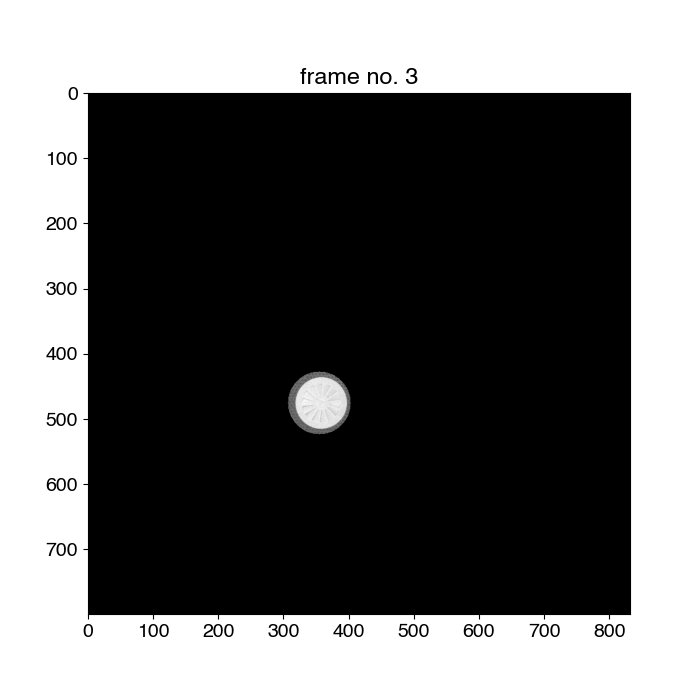

In [33]:
plt.close(3)
pltdisplay( 7, disk_mask, 3)

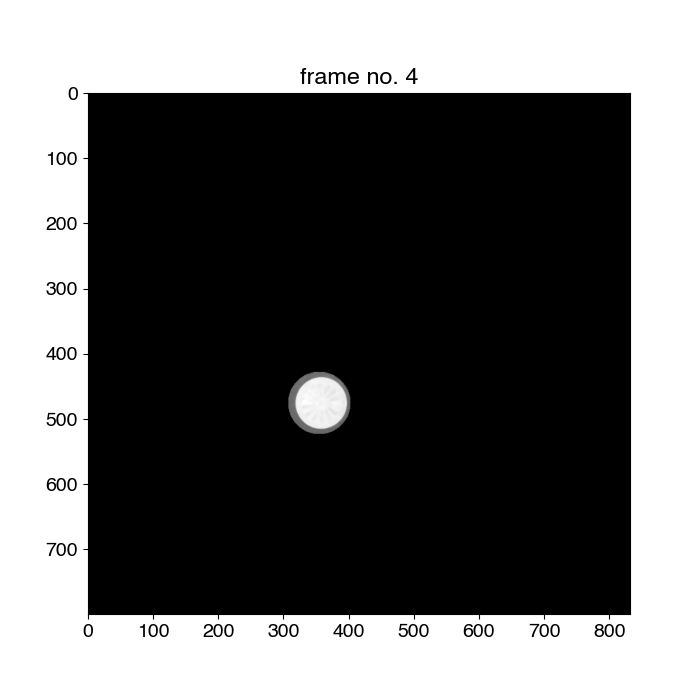

In [34]:
plt.close(4)
pltdisplay( 7, cv.medianBlur(disk_mask,5), 4)

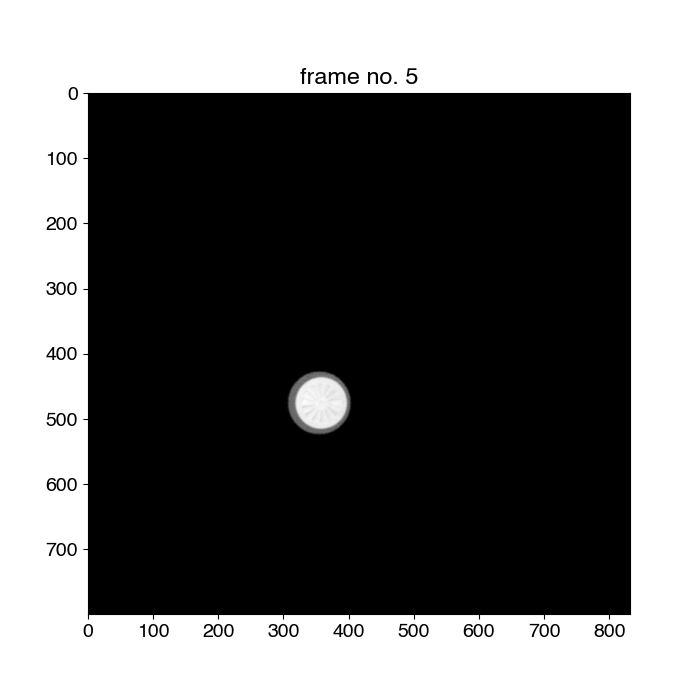

In [38]:
plt.close(5)
pltdisplay( 7, cv.GaussianBlur( disk_mask, (5,5),0), 5)

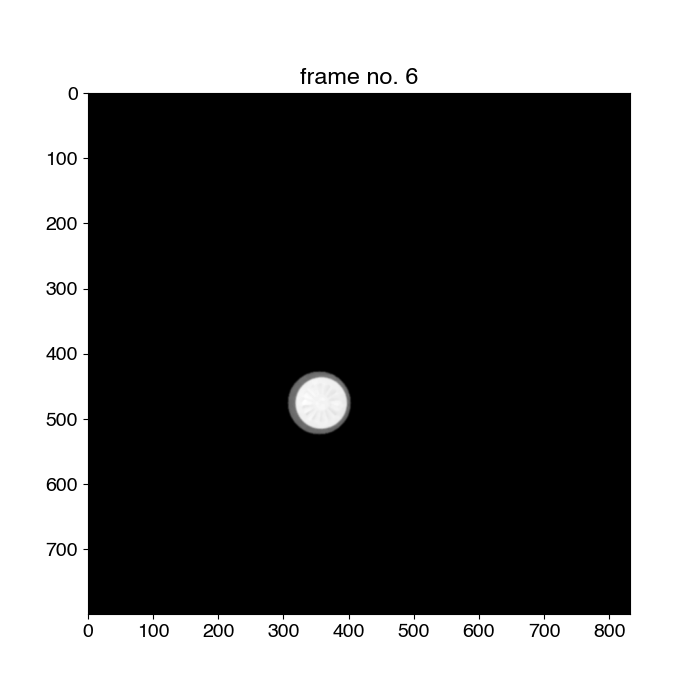

In [40]:
plt.close(6)
pltdisplay( 7, cv.medianBlur( cv.GaussianBlur( disk_mask, (5,5),0), 5), 6)

In [41]:
disk_mask_smooth = cv.medianBlur( cv.GaussianBlur( disk_mask, (5,5),0), 5)

In [55]:
plt.close(7)
cvdisplay( cv.threshold(disk_mask_smooth, 120, 255,cv.THRESH_TOZERO)[1], 7)

[357.69998  478.1       44.120003]


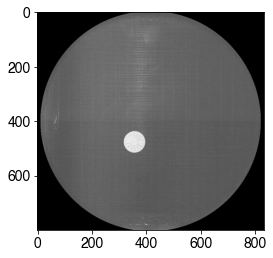

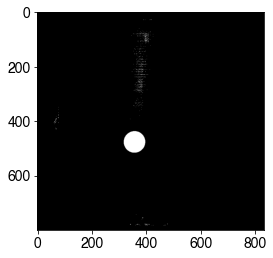

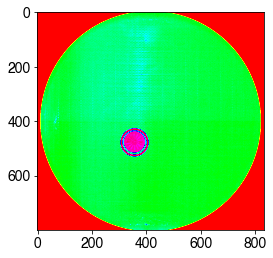

In [131]:
Rfact = 1.01 # factor of increase/decrease system radius
R =  0.5* np.min(np.shape(video[0])) # circular boundary radius, assuming image is adjusted to boundary

masked_image, image = circ_mask(cv.convertScaleAbs(video[0]), R, Rfact)

plt.figure()
plt.imshow(masked_image, cmap=cm.binary_r)

circles = None
dp = 1
tR = 45
dfact=2
cs = 2

# Iteratively search for disks, self-adjusting parameters to best fit
while cs>1:
    while circles is None and dp<tR:
        circles = locate_disk(masked_image, dp, dfact*tR, int(tR/2), tR)
        dp = dp + 0.1
    cs = np.shape(circles[0])[0]
    if cs>1: 
        dfact = dfact * 0.95
circles = circles[0,0]

print(circles)

inrange_image = cv.inRange(masked_image, 150, 255)

# Thresholding
plt.figure()
plt.imshow(inrange_image, cmap=cm.binary_r)

x0 = int(circles[0])
y0 = int(circles[1])
r = int(circles[2])

cir_image = np.copy(masked_image)
cv.circle(cir_image, (int(circles[0]),int(circles[1])), int(1.1*r), (255,255,0), 5);
plt.figure()
plt.imshow(cir_image,cmap=cm.hsv)



In [68]:
locate_disk(cv.inRange(imm, 150,255), 3.1, 100, 30, 45)

array([[[354.94998, 475.84998,  40.23   ]]], dtype=float32)

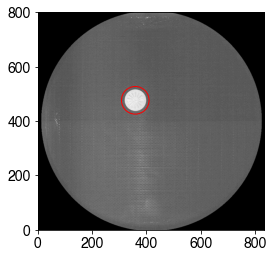

In [32]:

figure, axes = plt.subplots() 

cc = plt.Circle((circles[0], circles[1]), circles[2], edgecolor='r'
                ,facecolor='none' )
plt.xlim(0,832)
plt.ylim(0,800)
axes.add_artist(cc)
plt.imshow(masked_image, cmap=cm.binary_r)


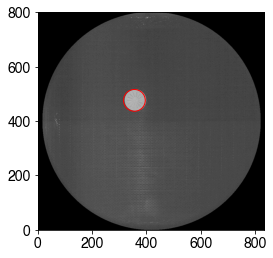

In [400]:
circles = cv.HoughCircles(image, cv.HOUGH_GRADIENT, 1.5, 50
                          ,minRadius=30,maxRadius=50)

figure, axes = plt.subplots() 
cc = plt.Circle((circles[0,0,0], circles[0,0,1]), circles[0,0,2], edgecolor='r'
                ,facecolor='none' )
plt.xlim(0,832)
plt.ylim(0,800)
axes.add_artist(cc)
plt.imshow(masked_image, cmap=cm.binary_r)


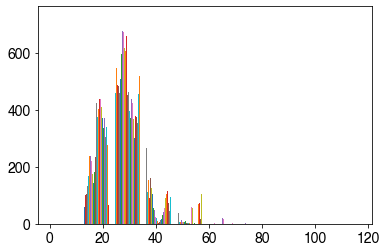

In [102]:
plt.hist(frame.T[0]);

In [142]:
ret, binary_ad = cv.threshold(image,40,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

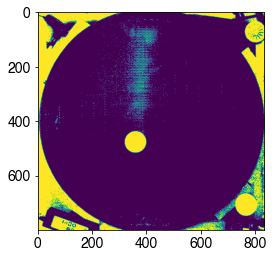

In [143]:
plt.figure()
plt.imshow(binary_ad)

TypeError: 'NoneType' object is not subscriptable

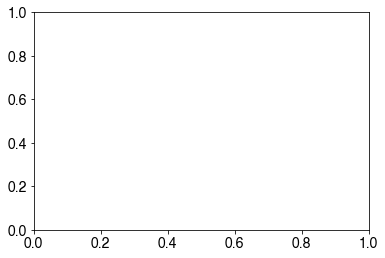

In [144]:
circles = cv.HoughCircles(binary_ad, cv.HOUGH_GRADIENT, 1,1
                          ,minRadius=10,maxRadius=90)

figure, axes = plt.subplots() 
cc = plt.Circle((circles[0,0,0], circles[0,0,1]), circles[0,0,2], edgecolor='r'
                ,facecolor='none' )
plt.xlim(0,800)
plt.ylim(0,832)
axes.set_aspect(1)
axes.add_artist(cc)
plt.imshow(image)

In [184]:
region = np.zeros((np.shape(image)[0], np.shape(image)[1]), dtype=np.uint8)
mask = cv.circle(region, (400,416), 410, 255, -1)

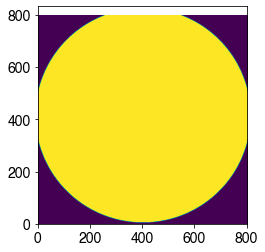

In [185]:
plt.figure()
plt.xlim(0,800)
plt.ylim(0,832)
plt.imshow(mask)



In [169]:
np.shape(image)

(800, 832)

In [159]:
cv.HoughCircles(image, cv.HOUGH_GRADIENT, 2, 300
                          ,minRadius=1, maxRadius=500)

array([[[763. , 709. ,  38. ],
        [355. , 475. ,  41.2]]], dtype=float32)

In [159]:
cv.HoughCircles(image, cv.HOUGH_GRADIENT, 2, 300
                          ,minRadius=1, maxRadius=500)

array([[[763. , 709. ,  38. ],
        [355. , 475. ,  41.2]]], dtype=float32)

In [68]:
np.shape(image)

(800, 832)

In [75]:
circles[0,0,1]

476.25

In [43]:
circles = cv.HoughCircles(image, cv.HOUGH_GRADIENT, 1.5,1
                          ,minRadius=1,maxRadius=90)

In [56]:
circles[0,0,0]

356.25

In [57]:
for i in icircles[0,:]:
    # draw the outer circle
    cv.circle(frame.T[0],(i[0],i[1]),i[2],(0,255,0),2)

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Layout of the output array img is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)
>  - Expected Ptr<cv::UMat> for argument 'img'


In [ ]:
cv2.waitKey(0) 

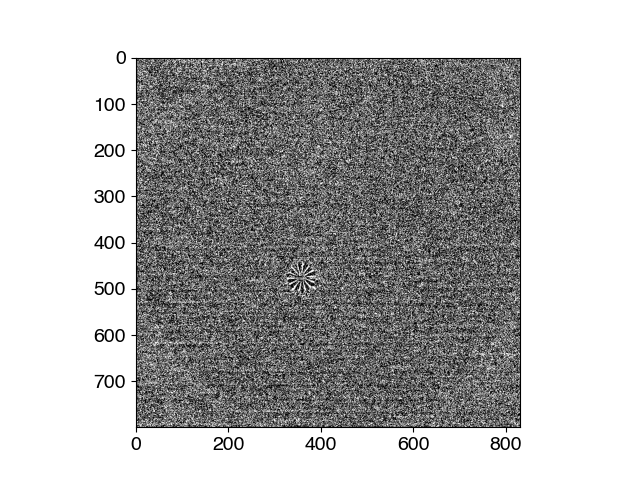

In [14]:
plt.figure(1)
plt.imshow(video[1]-video[0])

In [5]:
datos = pd.read_pickle('tracks/3988fa72e13c390c35b4a55c0495bc63.pkl.xz')
datos = datos[['x','y','frame']]

X = datos.x.values
Y = datos.y.values
it = datos.frame.values
xf = signal.savgol_filter(X, 9, 5)
yf = signal.savgol_filter(Y, 9, 5)
vxf = xf[1:] - xf[:-1]
vyf = yf[1:] - yf[:-1]
xf = xf[:-1]
yf = yf[:-1]

nframes = len(datos)-1

datos.head()


,x,y,frame
0,363.396279,533.013782,1
1,363.571671,533.130123,2
2,363.886110,533.025815,3
3,363.869190,533.091061,4
4,363.420557,533.088331,5


In [6]:
def update(dt):
    plt.close('all')
    fig = plt.figure(figsize=(7.5,6))
    cmm = colors.ListedColormap.reversed(cm.viridis)
    ecolors = (cm.viridis_r((it[::dt]/ it[::dt].max()) ))
    dr = np.max([xf.max()-xf.min(), yf.max()-yf.min()]) *1.1
    plt.xlim(xf.min()*0.9,xf.min()+dr)
    plt.ylim(yf.min()*0.9,yf.min()+dr)
    plt.scatter(xf[::dt], yf[::dt], s=80, facecolors='none', edgecolors=ecolors, linewidths=0.75, alpha=0.75)
    normc = norm = colors.Normalize(vmin=0, vmax=100)
    cbar=plt.colorbar(cm.ScalarMappable(cmap=cm.viridis_r, norm = normc),
                      label= 'time (% of movie length)',orientation="vertical",shrink=0.99)
    #fig.canvas.draw() # with inline
    #fig.show() # with ipympl
    #return fig

In [7]:
plt.close('all')
fig = widgets.interact(update,dt=widgets.BoundedIntText(min=1, max=500, step=1, value=50));

interactive(children=(BoundedIntText(value=50, description='dt', max=500, min=1), Output()), _dom_classes=('wi…

In [9]:
datos.to_csv('tabla.csv')

In [44]:
histx, edgesx = np.histogram(vxf, bins=100, density=True)
histy, edgesy = np.histogram(vyf, bins=100, density=True)
hist, edges = np.histogram(np.sqrt(vxf**2+vyf**2), bins =200, range= (0,1.2),density=True)

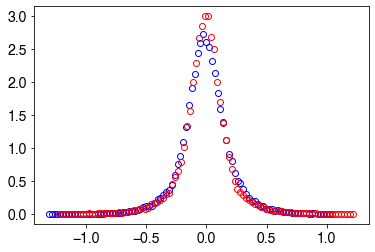

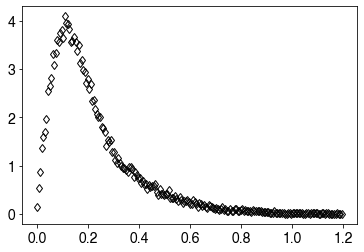

In [47]:
plt.close('all')
plt.figure(2)
plt.plot( edgesx[:-1], histx,'o',mfc='none', mec='b');
plt.plot(edgesy[:-1], histy, 'o', mfc='none',mec='r');
plt.figure(3)
plt.plot(edges[:-1], hist, 'd',c='k',mfc='none');